In [50]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [99]:
main_df = pd.read_csv('netflix_titles.csv')
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [100]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- show_id: unique id of each show (not much of a use for us in this notebook)
- type: The category of a show, can be either a Movie or a TV Show
- title: Name of the show
- director: Name of the director(s) of the show
- cast: Name of actors and other cast of the show
- country: Name of countries the show is available to watch on Netflix
- date_added: Date when the show was added on Netflix -> datatime
- release_year: Release year of the show
- rating: Show rating on netflix
- duration: Time duration of the show
- listed_in: Genre of the show
- description: Some text describing the show

In [101]:
# 전체 결측치 확인

main_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [102]:
# check null rate

for i in main_df.columns: 
    null_rate = main_df[i].isna().sum() / len(main_df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

director's null rate :29.91%
cast's null rate :9.37%
country's null rate :9.44%
date_added's null rate :0.11%
rating's null rate :0.05%
duration's null rate :0.03%


In [103]:
main_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## rating 전처리

In [104]:
# rating 

main_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [105]:
# rating 결측치 조회

main_df[main_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [106]:
# rating 결측치 삭제

main_df = main_df[main_df['rating'].notna()]
main_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [107]:
main_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [108]:
# rating 분포 확인

main_df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64

In [109]:
# 84 min, 66 min, 74 min 이상값이 duration대신에 들어있을 확률이 높아 조회

main_df[main_df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [110]:
# 등급 찾아서 replacing

rating_replacements = {
    5541: 'TV-MA',
    5794: 'R',
    5813: 'R' }

for id, rate in rating_replacements.items():
    main_df.iloc[id, 3] = rate

In [111]:
main_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

## rating visualization

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



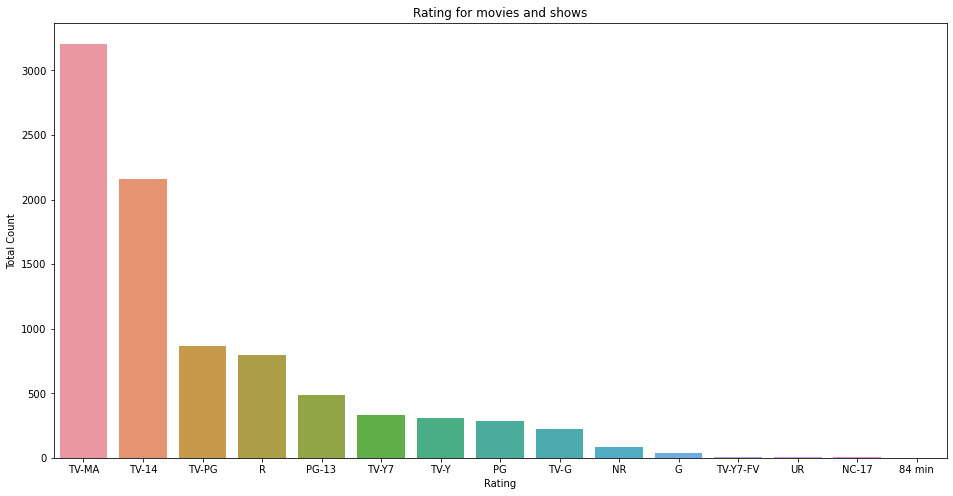

In [112]:
# Rating for movies and shows visualization

rating_count  = main_df.rating.value_counts()
print(rating_count)
plt.figure(figsize = (16,8))
sns.countplot(main_df.rating, order = rating_count.index[0:15])
plt.title("Rating for movies and shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

**각 등급이 의미하는 바를 기준으로 총 14개의 등급을 미국의 상영등급 체계인 5개로 묶어보겠다**

1) 각 등급이 의미하는 바
'TV-PG': 어린이가 시청하려면 보호자 지도가 권장되는 프로그램,
'TV-MA': 17세 미만의 어린이 혹은 청소년한테 부적절한 프로그램',
'TV-Y7-FV': 7세 이상의 어린이를 위한 프로그램으로 매우 경미한 가상의 폭력 묘사가 있음.,
'TV-Y7': 7세 이상의 어린이를 위한 프로그램,
'TV-14': 14세 미만의 어린이 혹은 청소년이 시청하려면 보호자 지도가 권장되는 프로그램,
'R':  15세 관람가,
'TV-Y': 영유아를 위한 프로그램,
'NR': 청소년 관람불가,
'PG-13': 12세 관람가에서 15세 관람가 ,
'TV-G': 모든 연령이 시청할 수 있는 프로그램. 다만 어린이를 대상으로 하지는 않았다,
'PG': 12세 관람가,
'G': 전체관람가,
'UR': 청소년 관람불가 등급
'NC-17': 청소년 관람불가 등급
}

2) 미국 관람등급 체계에 맞춰 5개로 분류 했는데 R관람가는 'R'밖에 없어서 'NC-17'로 편입하겠다.

 G: 전체 관람가: 'TV-Y', 'TV-G', 'G'
 PG: 부모 지도하 전체 관람가: 'TV-PG', 'TV-Y7','TV-Y7-FV', 'PG'
 PG-13: 부모 동반하 13세 이상 관람가:  'TV-14', 'PG-13'
 R: 17세 미만 보호자 동반 관람가: 'R'
 NC-17: 17세 이하 관람 불가 : 'NC-17', 'NR', 'UR'


 - G: 전체 관람가: 'TV-Y', 'TV-G', 'G'
 - PG: 부모 지도하 전체 관람가: 'TV-PG', 'TV-Y7','TV-Y7-FV', 'PG'
 - PG-13: 부모 동반하 13세 이상 관람가:  'TV-14', 'PG-13'
 - NC-17: 17세 이하 관람 불가 : 'NC-17', 'NR', 'UR', 'R'

In [113]:
ratings_ages = {
    'TV-PG': 'Older Kids',    ## 부모 지도하 전체 관람가
    'TV-MA': 'Adults',        ## 17세 이하 관람 불가
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',         ## 부모 동반하 13세 이상 관람가
    'R': 'Adults',
    'TV-Y': 'Kids',           ## 전체관람가
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [114]:
main_df['target_ages'] = main_df['rating'].replace(ratings_ages) 
main_df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min'], dtype=object)

In [115]:
# target_ages을  category 로 변경 

main_df['target_ages'] = pd.Categorical(main_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
main_df.dtypes

show_id           object
type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
target_ages     category
dtype: object

In [116]:
def generate_rating_df(main_df):
    rating_df = main_df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [117]:
rating_df = generate_rating_df(main_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

In [118]:
movie_rating_df = generate_rating_df(main_df)
show_rating_df = generate_rating_df(main_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

### date_added 전처리

In [84]:
# date_added 는 datatime으로 변경

# main_df['date_added'] = main_df['date_added'].astype('datetime64')
# main_df['date_added']

0      2021-09-25
1      2021-09-24
4      2021-09-24
7      2021-09-24
8      2021-09-24
          ...    
8801   2016-03-09
8802   2019-11-20
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 7964, dtype: datetime64[ns]

In [119]:
# data_added 결측치 삭제

main_df = main_df[main_df['date_added'].notna()]
main_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Older Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids


In [120]:
# 확인

main_df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
target_ages        3
dtype: int64

In [93]:
#datetime64을 objectdtype으로 변경

# from datetime import datetime

# def convert_datetime(dt):
    # return datetime.strftime(dt, '%Y-%m-%d %H:%M-%S')

# main_df['date_added']= main_df['date_added'].apply(convert_datetime)

In [121]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8793 non-null   object  
 1   type          8793 non-null   object  
 2   title         8793 non-null   object  
 3   director      6172 non-null   object  
 4   cast          7968 non-null   object  
 5   country       7964 non-null   object  
 6   date_added    8793 non-null   object  
 7   release_year  8793 non-null   int64   
 8   rating        8793 non-null   object  
 9   duration      8790 non-null   object  
 10  listed_in     8793 non-null   object  
 11  description   8793 non-null   object  
 12  target_ages   8790 non-null   category
dtypes: category(1), int64(1), object(11)
memory usage: 901.8+ KB


In [122]:
main_df['date_added'] = main_df['date_added'].apply(lambda x: x.split(" ")[-1])
main_df['date_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: date_added, dtype: object

In [124]:
main_df['month_added'] = main_df['date_added'].apply(lambda x: x.split(" ")[0])
main_df['month_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: month_added, dtype: object

In [133]:
main_df['release_year'] = pd.to_numeric(main_df['release_year'])

In [135]:
main_df.dtypes

show_id           object
type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
target_ages     category
month_added       object
dtype: object

In [37]:
# country 결측치 조회

main_df[main_df['country'].isna()]

# country 결측치 삭제

main_df = main_df[main_df['country'].notna()]
main_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,cont
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Teens,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Adults,0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,0


In [38]:
# country 분포 check

main_df['country'].value_counts()

United States                                 2812
India                                          972
United Kingdom                                 418
Japan                                          243
South Korea                                    199
                                              ... 
Peru, Germany, Norway                            1
United States, France, Canada, Spain             1
Canada, United States, Denmark                   1
France, Australia, Germany                       1
United States, Israel, Italy, South Africa       1
Name: country, Length: 748, dtype: int64

In [33]:
# contry 전체 값 

main_df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [34]:
# us_canada, eu_me_af, la, ap 대륙별로 나눠서 새로운 dataframe 생성

us_canada = ['United States', 'Canada']
eu_me_af = ['Vatican City', 'Gibraltar', 'San Marino', 'Liechtenstein', 'Monaco',
            'Faroe Islands', 'Andorra', 'Isle of Man', 'Seychelles', 'Mayotte',
            'Iceland', 'Malta', 'Cape Verde', 'Western Sahara', 'Montenegro',
            'Luxembourg', 'Comoros', 'Reunion', 'Djibouti', 'Cyprus',
            'Mauritius', 'Estonia', 'Equatorial Guinea', 'Bahrain', 'Latvia',
            'Guinea Bissau', 'Slovenia', 'Lesotho', 'Gabon', 'Botswana',
            'Gambia', 'Namibia', 'Lithuania', 'Albania', 'Qatar',
            'Bosnia And Herzegovina', 'Eritrea', 'Georgia', 'Moldova', 'Croatia',
            'Kuwait', 'Mauritania', 'Central African Republic', 'Ireland', 'Liberia',
            'Oman', 'Palestine', 'Slovakia', 'Norway', 'Finland', 'Republic of the Congo',
            'Denmark', 'Lebanon', 'Bulgaria', 'Libya', 'Sierra Leone', 'Serbia',
            'Togo', 'Switzerland', 'Israel', 'Austria', 'Belarus',
            'Hungary', 'United Arab Emirates', 'Portugal', 'Sweden', 'Jordan',
            'Greece', 'Czech Republic', 'Belgium', 'Tunisia', 'Burundi',
            'Benin', 'Rwanda', 'Guinea', 'Zimbabwe', 'Somalia', 'Netherlands',
            'Chad', 'Senegal', 'Romania', 'Syria', 'Zambia', 'Malawi',
            'Mali', 'Burkina Faso', 'Niger', 'Ivory Coast', 'Cameroon',
            'Madagascar', 'Yemen', 'Ghana', 'Mozambique', 'Angola', 'Saudi Arabia',
            'Poland', 'Morocco', 'Iraq', 'Ukraine', 'Algeria', 'Sudan', 'Spain',
            'Uganda', 'Kenya', 'Italy', 'South Africa', 'Tanzania', 'France', 'United Kingdom',
            'Germany', 'Turkey', 'Iran', 'DR Congo', 'Egypt', 'Ethiopia', 'Russia', 'Nigeria']
la = ['Puerto Rico', 'Uruguay', 'Panama', 'Costa Rica', 'El Salvador', 'Nicaragua', 'Paraguay',
      'Honduras', 'Dominican Republic', 'Cuba', 'Bolivia', 'Ecuador', 'Guatemala', 'Chile', 'Venezuela',
      'Peru', 'Argentina', 'Colombia', 'Mexico', 'Brazil']
ap = ['Niue', 'Nauru', 'Tuvalu', 'Cook Islands', 'Palau', 'Northern Mariana Islands', 'Marshall Islands',
      'Tonga', 'Micronesia', 'Kiribati', 'Guam', 'Samoa', 'French Polynesia', 'New Caledonia', 
      'Vanuatu', 'Brunei', 'Maldives', 'Macau', 'Solomon Islands', 'Bhutan', 'Fiji', 'Timor-Leste', 'Armenia',
      'Mongolia', 'Georgia', 'New Zealand', 'Singapore', 'Turkmenistan', 'Kyrgyzstan', 'Laos',
      'Hong Kong', 'Papua New Guinea', 'Tajikistan', 'Azerbaijan', 'Cambodia', 'Kazakhstan', 'Chile', 'Sri Lanka',
      'North Korea', 'Australia', 'Nepal', 'Malaysia', 'Peru', 'Uzbekistan', 'Canada', 'Afghanistan',
      'South Korea', 'Myanmar', 'Thailand', 'Turkey', 'Iran', 'Vietnam', 'Philippines', 'Japan',
      'Mexico', 'Russia', 'Bangladesh', 'Pakistan', 'Indonesia', 'United States', 'India', 'China']

In [63]:
cont_df = pd.read_csv('cont_df.csv')
cont_df.head()

,Unnamed: 0,date_added,cont,country
0,0,2021,United States and Canada,United States
1,1,2021,"Europe, Middle East, and Africa",South Africa
2,2,2021,Asia-Pacific,India
3,3,2021,United States and Canada,United States
4,4,2021,"Europe, Middle East, and Africa",Ghana


In [65]:
# 작품 전체 대륙별 비교 시각화

country_df = cont_df['cont'].value_counts().reset_index()
country_df = country_df[country_df['cont'] /  country_df['cont'].sum() > 0.01]

fig = px.pie(country_df, values='cont', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [136]:
released_year_df = main_df.loc[main_df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = main_df.loc[main_df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

KeyError: 'year_added'

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
# 시간의 흐름에 따른 상영등급별 작품 전체 시각화

In [ ]:
# 시간의 흐름에 따른 장르별 작품 전체 시각화

# Genres

In [141]:
movie_df = main_df[main_df['type'] == 'Movie']
show_df = main_df[main_df['type'] == 'TV Show']

In [142]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Adults,2021


In [143]:
show_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Adults,2021


In [144]:
movie_df['genre'] = movie_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
show_df['genre'] = show_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

display(movie_df['genre'].head())
display(show_df['genre'].head())

0                                       [Documentaries]
6                            [Children & Family Movies]
7     [Dramas, Independent Movies, International Mov...
9                                    [Comedies, Dramas]
12                       [Dramas, International Movies]
Name: genre, dtype: object

1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
5                 [TV Dramas, TV Horror, TV Mysteries]
Name: genre, dtype: object

In [145]:
from sklearn.preprocessing import MultiLabelBinarizer

def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df


def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [146]:
top_genres(movie_df, title='Top Movies Genres')

In [147]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

In [148]:
top_genres(show_df, title='Top TV Shows Genres')

In [152]:
movie_df['principal_genre'] = movie_df['genre'].apply(lambda genres: genres[0])
movie_df['principal_genre'].head()

0                Documentaries
6     Children & Family Movies
7                       Dramas
9                     Comedies
12                      Dramas
Name: principal_genre, dtype: object

In [154]:
def check_genre_contains(genres):
    for genre in genres:
        if genre in top_movies_genres:
            return True
    return False

In [155]:
year_genre_df = movie_df[(movie_df['principal_genre'].isin(top_movies_genres)) & (movie_df['year_added'] >= 2017)].groupby(['principal_genre', 'year_added']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'year_added', 'count']

fig = px.sunburst(year_genre_df, path=['year_added', 'principal_genre'], values='count', color='year_added')
fig.show()

KeyError: 'year_added'

In [67]:
# 워드클라우드


In [18]:
# 기본 통계 살펴보기

main_df.describe()

,release_year
count,8793.000000
mean,2014.183100
std,8.824128
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000
